# Importação de Biblioteca e Dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,cross_val_predict

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# DL model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

#Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

#Pipeline
from sklearn.pipeline import Pipeline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
hotel_c=pd.read_csv("Hotel Reservations.csv")

hotel=hotel_c.copy()

hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Processamento de Dados para Modelos de Machine Learning

In [8]:
cat=hotel.select_dtypes(exclude=[np.number])

for i in cat.columns:
    hotel[i]=hotel[i].astype('category')

# Data Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [9]:
for i in cat.columns:
    hotel[i+"_encoder"]=LabelEncoder().fit_transform(hotel[i])

num=hotel.select_dtypes(include=[np.number])

x=num.drop('booking_status_encoder',axis=1)
y=num['booking_status_encoder']

x=pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()),columns=x.columns)

x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0


In [10]:
data=x.join(y)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder,booking_status_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0,1
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0,1
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0,0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0,0


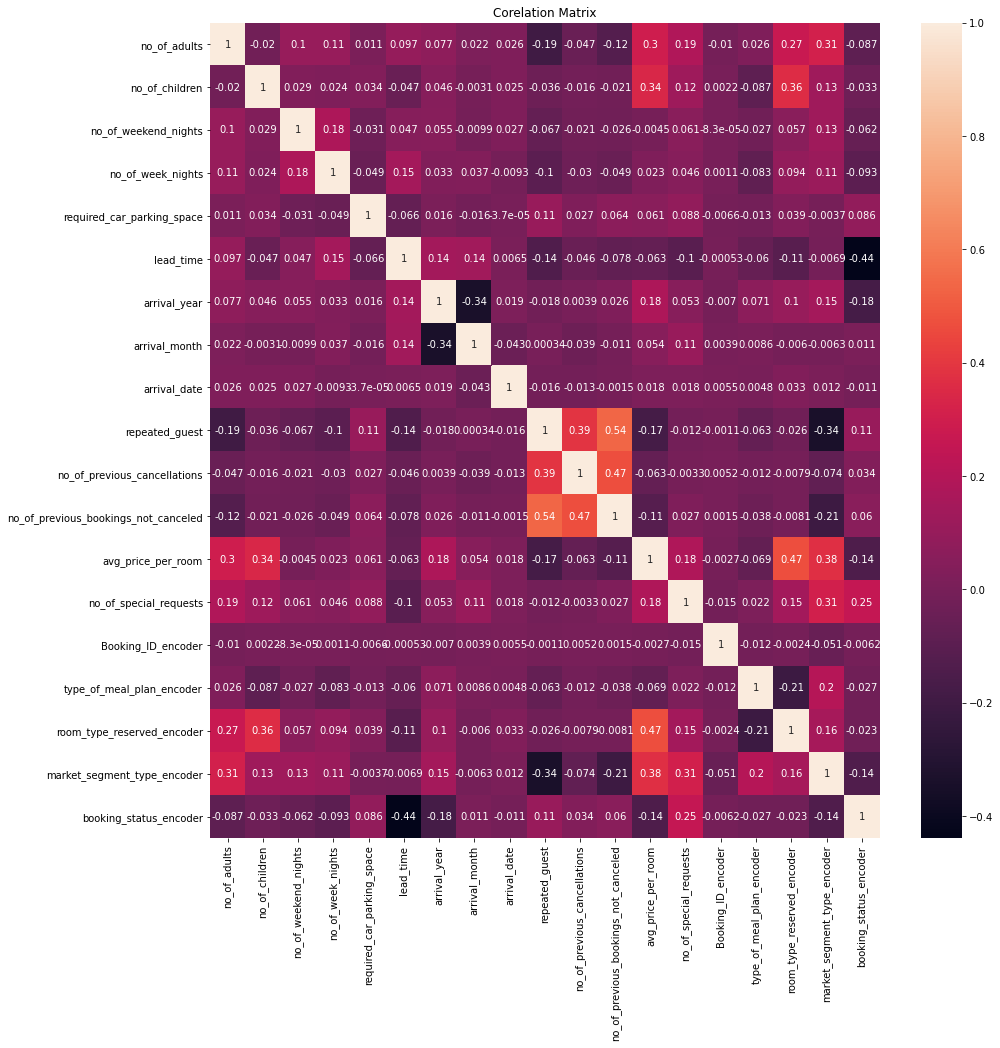

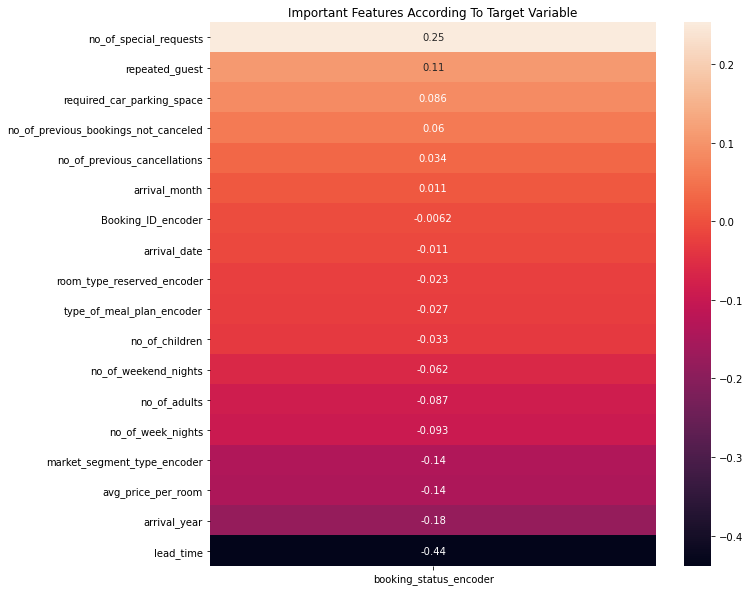

In [14]:
# Corelação Matrix
cor=data.corr()
plt.figure(figsize=(15,15))
plt.title('Corelation Matrix')
sns.heatmap(cor,annot=True)
plt.show()

cor=data.corr()
target=cor['booking_status_encoder'].drop('booking_status_encoder')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Important Features According To Target Variable')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Construção Modelo Machine Learning

In [18]:
# Logistic Regression
def mdl_lr(x_train,x_test,y_train,y_test):
    global acc_trn_lr,acc_lr,f1_lr
    
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_lr=lr.score(x_train,y_train)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Logistic Regression**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_lr)
    print("Testing Accuracy : ",acc_lr)
    print("F1 Score : ",f1_lr)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

# Gaussian Naive Bayes
def mdl_nb(x_train,x_test,y_train,y_test):
    global acc_trn_nb,acc_nb,f1_nb

    lr=GaussianNB()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_nb=lr.score(x_train,y_train)
    acc_nb=accuracy_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Gaussian Naive Bayes**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_nb)
    print("Testing Accuracy : ",acc_nb)
    print("F1 Score : ",f1_nb)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

# Random Forest
def mdl_rf(x_train,x_test,y_train,y_test):
    global acc_trn_rf,acc_rf,f1_rf

    lr=RandomForestClassifier(random_state=10)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_rf=lr.score(x_train,y_train)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Random Forest**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_rf)
    print("Testing Accuracy : ",acc_rf)
    print("F1 Score : ",f1_rf)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

# X Gradient Boosting
def mdl_xgb(x_train,x_test,y_train,y_test):
    global acc_trn_xgb,acc_xgb,f1_xgb

    lr=XGBClassifier(random_state=10)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_xgb=lr.score(x_train,y_train)
    acc_xgb=accuracy_score(y_test,y_pred)
    f1_xgb=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********X Gradient Boosting**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_xgb)
    print("Testing Accuracy : ",acc_xgb)
    print("F1 Score : ",f1_xgb)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

Text(0, 0.5, 'Counting values')

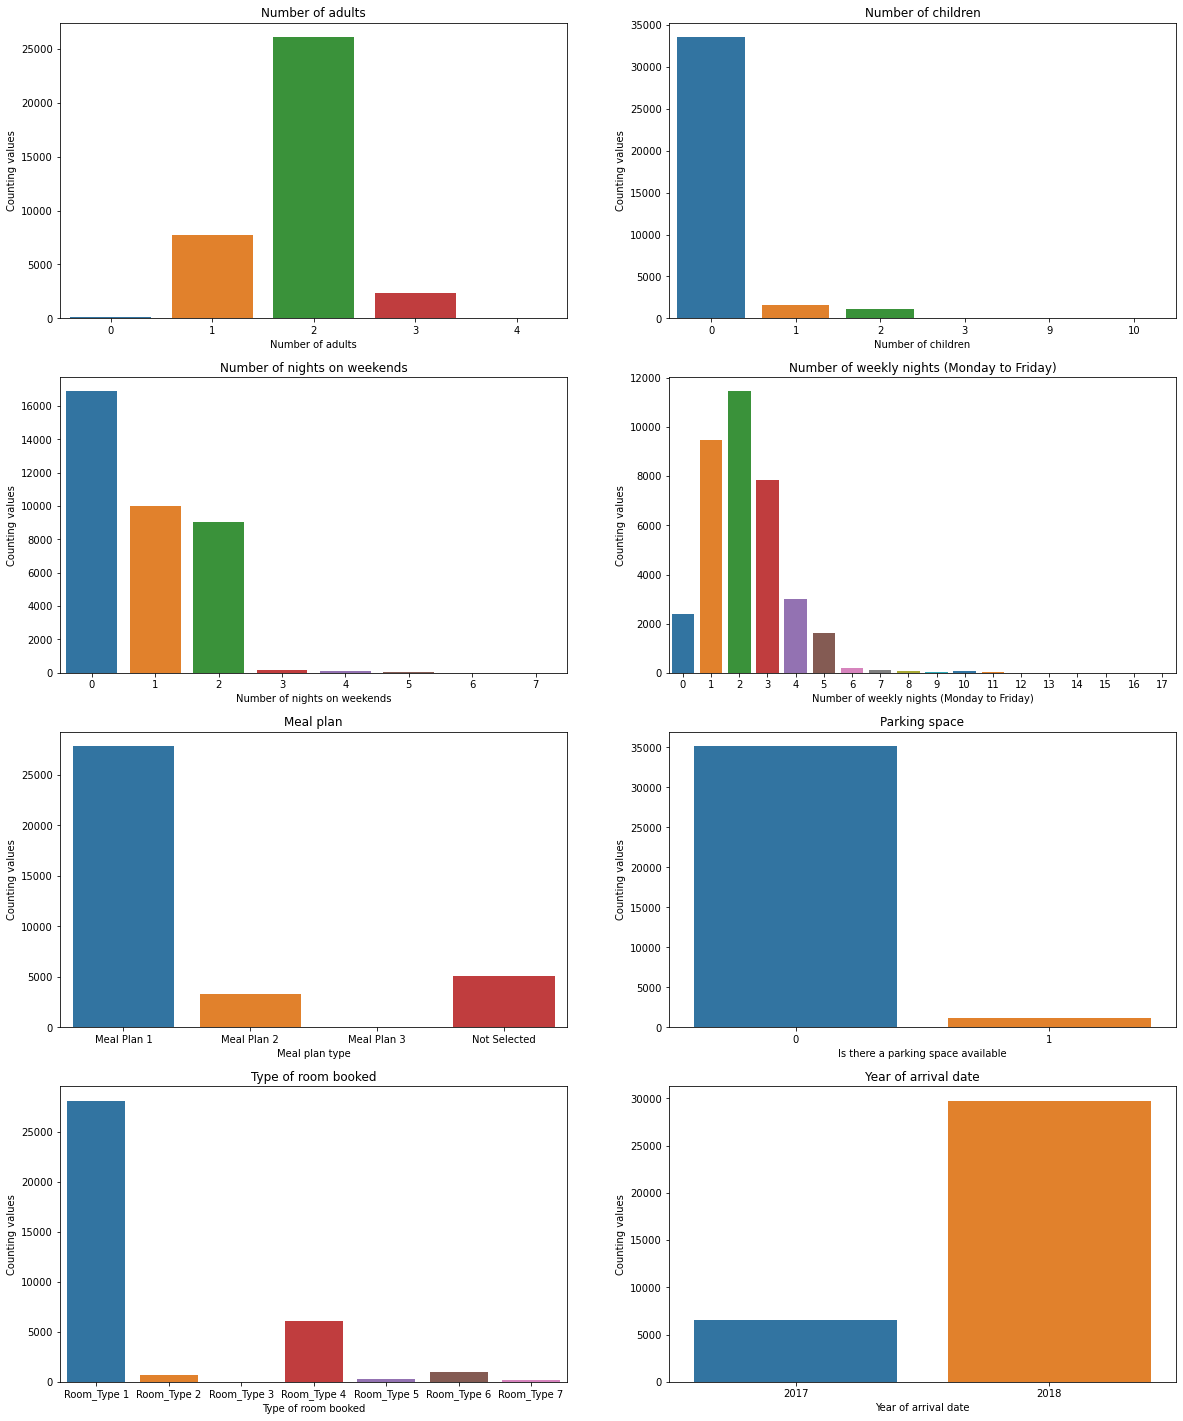

In [21]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Number of adults')
sns.countplot(x = 'no_of_adults', palette = 'tab10', data = hotel)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')

plt.subplot(4,2,2)
plt.gca().set_title('Number of children')
sns.countplot(x = 'no_of_children', palette = 'tab10', data = hotel)
plt.xlabel('Number of children')
plt.ylabel('Counting values')

plt.subplot(4,2,3)
plt.gca().set_title('Number of nights on weekends')
sns.countplot(x = 'no_of_weekend_nights', palette = 'tab10', data = hotel)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')

plt.subplot(4,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sns.countplot(x = 'no_of_week_nights', palette = 'tab10', data = hotel)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')

plt.subplot(4,2,5)
plt.gca().set_title('Meal plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'tab10', data = hotel)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')

plt.subplot(4,2,6)
plt.gca().set_title('Parking space')
sns.countplot(x = 'required_car_parking_space', palette = 'tab10', data = hotel)
plt.xlabel('Is there a parking space available')
plt.ylabel('Counting values')

plt.subplot(4,2,7)
plt.gca().set_title('Type of room booked')
sns.countplot(x = 'room_type_reserved', palette = 'tab10', data = hotel)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')

plt.subplot(4,2,8)
plt.gca().set_title('Year of arrival date')
sns.countplot(x = 'arrival_year', palette = 'tab10', data = hotel)
plt.xlabel('Year of arrival date')
plt.ylabel('Counting values')

Text(-2.6999999999999957, 0.5, 'Number of bookings')

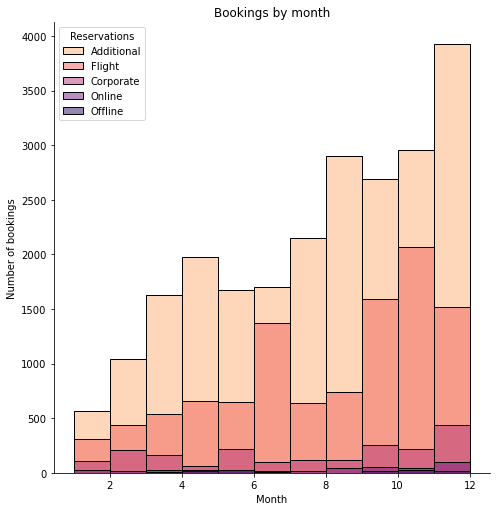

In [22]:
sns.displot(hotel, x='arrival_month', binwidth=1, height=7, palette='magma', hue='market_segment_type', legend = False)
plt.gca().set_title('Bookings by month')
plt.legend(title= 'Reservations',
           labels=['Additional','Flight','Corporate','Online','Offline'])
plt.xlabel('Month')
plt.ylabel('Number of bookings')

Text(0, 0.5, 'Days between booking and arrival')

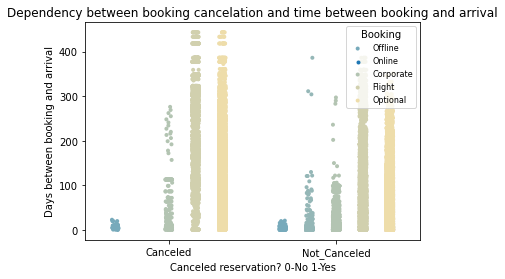

In [24]:
stp = sns.stripplot(data=hotel, x="booking_status", y="lead_time", hue="market_segment_type", jitter = True, dodge = True, palette = 'blend:#7AB,#EDA', size = 4)
plt.gca().set_title('Dependency between booking cancelation and time between booking and arrival')
labels_dict = {0:'Offline', 1:'Online', 2:'Corporate', 3:'Flight', 4:'Optional'}
plt.legend(loc='upper right', title='Booking',labels=labels_dict.values(), prop={'size': 8})
stp.set_xlabel('Canceled reservation? 0-No 1-Yes')
stp.set_ylabel('Days between booking and arrival')

No handles with labels found to put in legend.


Text(27.0, 0.5, 'Average price per room')

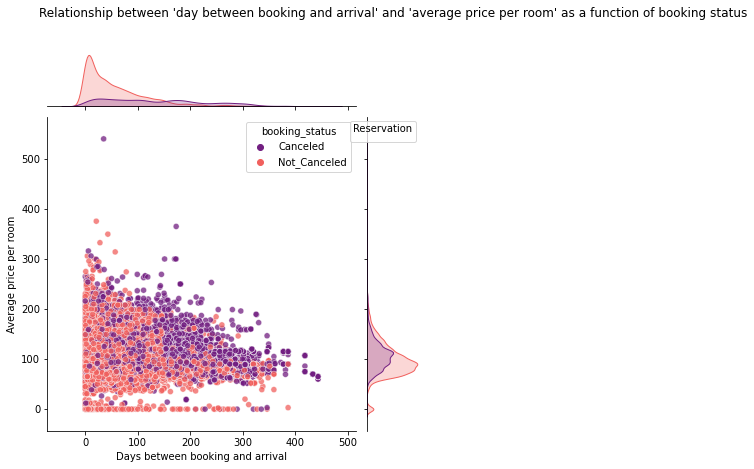

In [25]:
jnt = sns.jointplot(data=hotel, x='lead_time', y='avg_price_per_room', 
              hue='booking_status', alpha=0.75, palette = 'magma')
plt.gca().set_title('Relationship between \'day between booking and arrival\' and \'average price per room\' as a function of booking status', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 8})
jnt.ax_joint.set_xlabel('Days between booking and arrival')
jnt.ax_joint.set_ylabel('Average price per room')